

# CLIVAR summer school, marine heatwave detection
*written by Amandine Schaeffer, July 2023.*

<img src = https://tos.org/oceanography/assets/images/content/31-2_hobday_f2.jpg width = "400" >


In this lab, we will explore some concepts on marine heatwave (MHW) detection.

We will introduce some basic Python tools, such as plotting and data analysis, using an example of daily time-series from NOAA OISST from 1982 to 2022, extracted at an offshore point of the Adriatic Sea, not far from Trieste (13.125°E; 44.875°N). We will start with using the marine heatwave definition from Hobday et al., 2016 (*http://passage.phys.ocean.dal.ca/~olivere/docs/Hobdayetal_2016_PO_HierarchMHWDefn.pdf*), and you will then investigate the influence of various changes in the defintion.


To use this notebook, you will need Python3 installed on your local machine, or you can run this lab from your web browser using [Google Colaboratory](https://colab.research.google.com/).
You will need to download the following files (in the same working directory):
- sst_adriatic.csv which list the daily temperature estimates from the dataset
- Marine_Heatwaves_AS.py which is adapted from the mhw toolbox from the code written by Eric C. J. Oliver. https://github.com/ecjoliver/marineHeatWaves 
- ncdcOisst21Agg_picklocation.csv, or any other time-series that you will download from https://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst21Agg.html.

---------------------------------------------------------------------------------------------------------------------------

## Introducing Colab

[Google Colaboratory](http://colab.research.google.com/) (or "Colab", for short) is a python notebook that you can run in a browser window. Colab notebooks are just like Jupyter notebooks, except that they are hosted on the cloud. This means that you do not need to have python installed on your local machine --- you can run it straight from a web browser.

You will need a (free) [Google Account](https://myaccount.google.com/intro) to run the notebooks. If you would prefer not to sign up, you can still read the notebook, but you won't be able to run the code cells.

Colab should look and feel very similar to a Jupyter notebook. To execute a code cell, use the play button to the left of each cell, or the keyboard shortcut **CMD/CTRL+ENTER**. **SHIFT+ENTER** will move you to the next cell.

Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI)  to learn more, or check out this [Overview of Colab Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb).

## Colab and files

If you don't want to link your Google Drive (see below), you can upload the necessary files to the default working directory ("Content") and run this notebook (see the figure). However, each time the connection is lost, the files will be lost too and you will have to upload them again.
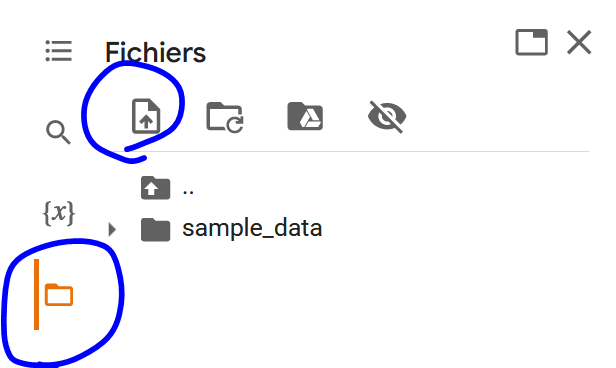

## Colab and Google drive

Colab integrates with Google Drive, so you can save your notebook, files, and figures to your own Drive if you would like. This is not required to run the lab, because figures and movies will be saved to the Colab virtual machine and displayed in your browser.

If you would like to mount your Google Drive in Colab, copy and paste the following code snippet and run it. The command will send you to a new browser window (make sure you allow pop-ups) to give permission for Colab to access your Drive. You can then locate your Google Drive by navigating to `drive/'My Drive'`:

```
from google.colab import drive
drive.mount('/content/drive')
!ls drive/'My Drive'
```

You can also save your notebook to Google Drive, or download a copy of the notebook file, using the **File Menu** in the top left corner.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Directory and file operations in Google Colab

Since Colab lets you do everything which you can in a locally hosted Jupyter notebook, you can also use shell commands like ls, dir, pwd, cd, cat, echo, et cetera using line-magic (%) or bash (!).

To browse the directory structure, you can use the file-explorer pane on the left.

In [2]:
!pwd
!ls
!ls sample_data

'pwd' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


## Notes on Python

In this lab, we will use [Python](https://www.python.org/) to investigate marine heatwaves. Python is free, flexible, easy to use, and has tons of online resources for beginners. If you have a question about Python, the default answer will be "have you Googled it?"

You do not need to be fluent in Python. You can run Python from within this notebook which provides examples to detect and plot marine heatwaves, then adapt the codes to go further. 

You are also encouraged to complete this [free online tutorial](https://www.codecademy.com/learn/learn-python) in your own time to familiarise yourself with Python syntax if you wish.

### Jupyter notebook

We will run the python labs in [Jupyter notebook](http://jupyter.org/). Jupyter notebook is an interective, web-based, computational environment. Within a notebook you can display text, mathematical notation, images, etc, using [Markdown](https://www.markdownguide.org/). For example:

#### Wave equation:
$$
\frac{\partial^2 f}{\partial t^2} = c^2 \frac{\partial^2 f}{\partial x^2}.
$$


If you double-click any cell, you can see the Markdown code used to create it.

Jupyter notebook also allows you to use "cells" of python code that be executed in real time.

To see this in action, move down to the next cell and enter the following python code:

```
string = "Hello world!"
print(string)
```

When you are finished, press **SHIFT + ENTER** to run the cell (or click **Run** in the menu above).

In [3]:
# This is a comment reminding you to enter your python code below. Don't forget to press shift + enter to run!


# Let's get started with marine heatwaves!


## Libraries

Python makes extensive use of freely available, open source *libraries*, which contain tonnes of useful functions etc that you can make use of. The following python code calls some standard libraries: `numpy` (pronounced "numb pie"), which contains useful functions for carrying out numerics, `matplotlib`, which allows us to plot data, and `os`, which allows us to do some command-line tasks like creating directories.

Since we will be using these libraries repeatedly, we will abbreviate their names to `np` and `plt`, respectively.

Finally, the last line instructs `matplotlib` to plot figures in the Jupyter notebook, just below the cell that calls it. That way, you will be able to view and save figures within the notebook.

**Move to the next cell by pressing DOWN, then press SHIFT + ENTER to run (or click "Run" in the menu above)**

In [4]:
# Numerics
import numpy as np

import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Directory/file creation
import os

# plot figures in Jupyter notebook
%matplotlib inline


## Load data

We start with a NOAA OISST daily time series from 1982-2022 for an offshore point in the Adriatic not far from Trieste.
Coordinates are: 13.125°E; 44.875°N


**Execute the following cells using SHIFT + ENTER**

,t,temp
0,1982-01-01,12.51
1,1982-01-02,11.98
2,1982-01-03,11.85
3,1982-01-04,11.84
4,1982-01-05,11.77


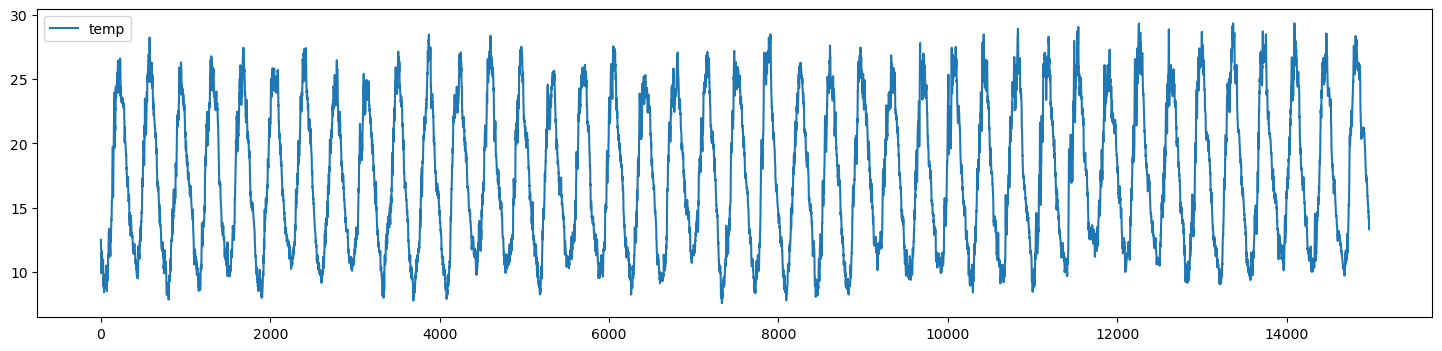

In [5]:
## Read the file and plot quickly. The dataset has one column for the date, and one for temeprature in degrees celius.
data = pd.read_csv('sst_adriatic.csv')

data.plot(figsize=(18, 4));
data.head()


,Temp
Date,
1982-01-01,12.51
1982-01-02,11.98
1982-01-03,11.85
1982-01-04,11.84
1982-01-05,11.77


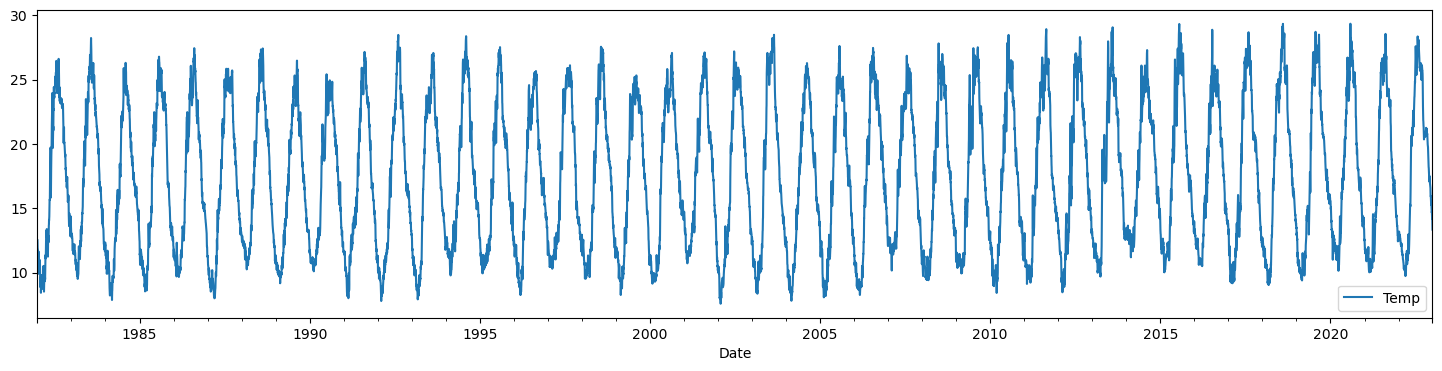

In [6]:
# Let's reformat the time-series into a dataframe, which has nice in-built functions

data["Date"] = pd.to_datetime(data['t'], format = '%Y-%m-%d')
data.set_index("Date", inplace=True)
data.drop(['t'], axis=1, inplace=True)
data.rename(columns={'temp': 'Temp'}, inplace=True)

data.plot(figsize=(18, 4));
data.head()

## Create a day-of-the-year climatology to use to compute anomalies

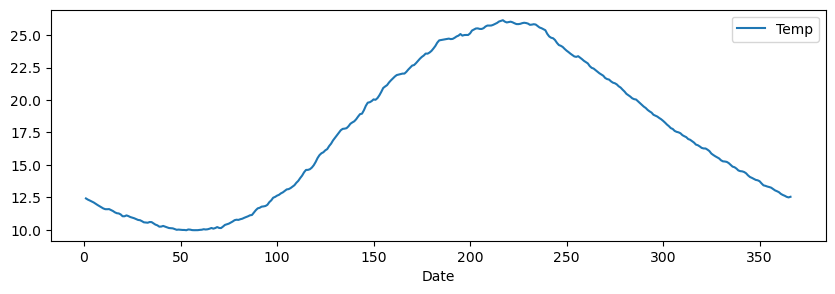

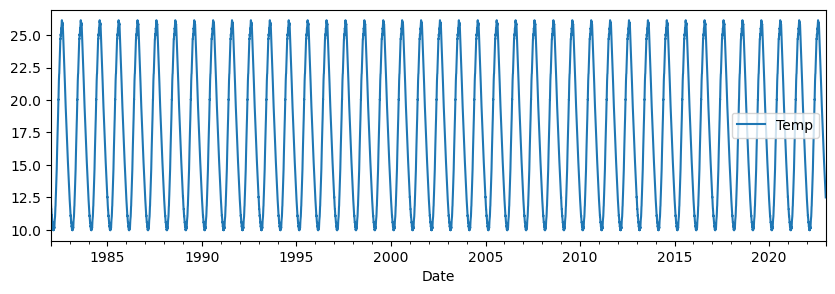

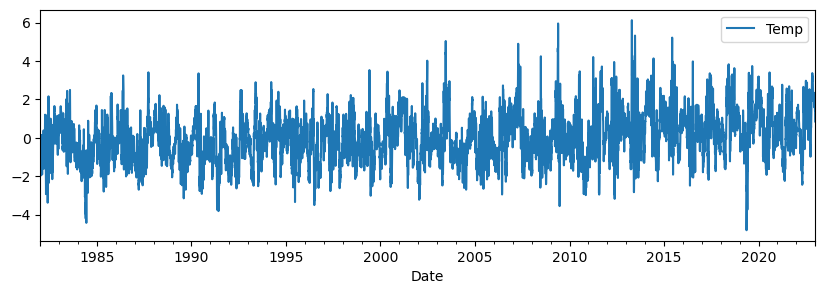

In [7]:
# Compute day-of-the-year climatology
data_clim_doy = data.groupby(data.index.dayofyear).mean()
data_clim_doy.plot(figsize=(10, 3));

# Compute day-of-the-year climatology on the same time index
data_ano_doy_ind = data.groupby(pd.to_datetime(data.index).dayofyear).transform('mean')
data_ano_doy_ind.plot(figsize=(10, 3));

# Compute anomalies
data_ano_doy = data - data_ano_doy_ind
data_ano_doy.head()
data_ano_doy.plot(figsize=(10, 3));

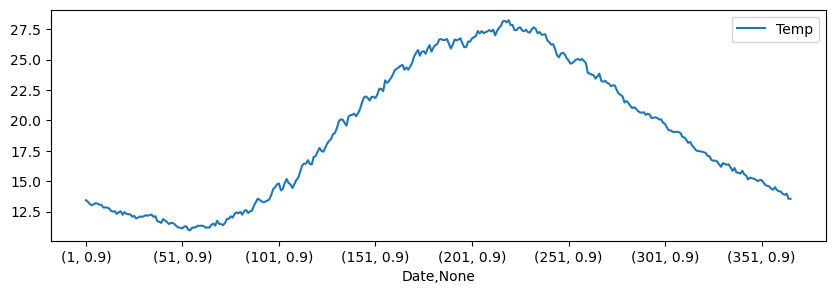

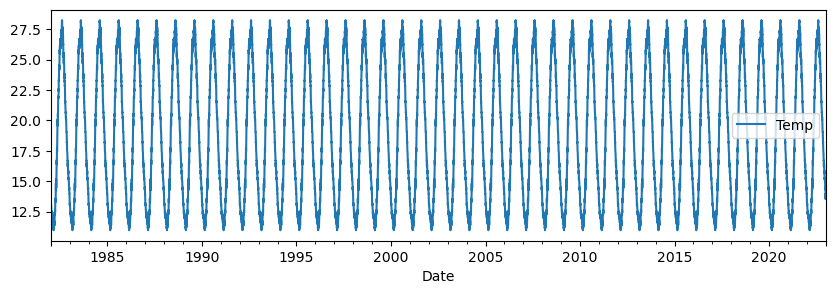

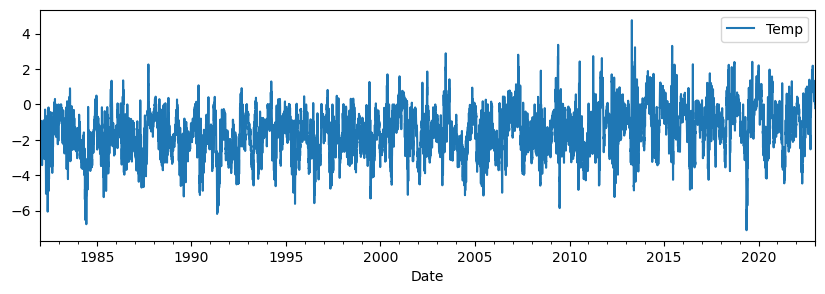

In [8]:
# Compute day-of-the-year climatology of the 90th percentile
data_clim_thres_doy = data.groupby(data.index.dayofyear).quantile([.9])
data_clim_thres_doy.plot(figsize=(10, 3));

# Compute day-of-the-year climatology of the 90th percentile on the same time index
data_clim_thres_doy_ind = data.groupby(pd.to_datetime(data.index).dayofyear).transform('quantile', .9)
data_clim_thres_doy_ind.plot(figsize=(10, 3));

# Compute anomalies from the 90th percentile
data_ano_thres_doy = data - data_clim_thres_doy_ind
data_ano_thres_doy.head()
data_ano_thres_doy.plot(figsize=(10, 3));

## Dtecting marine heatwaves, using the Hobday et al. (2006) method


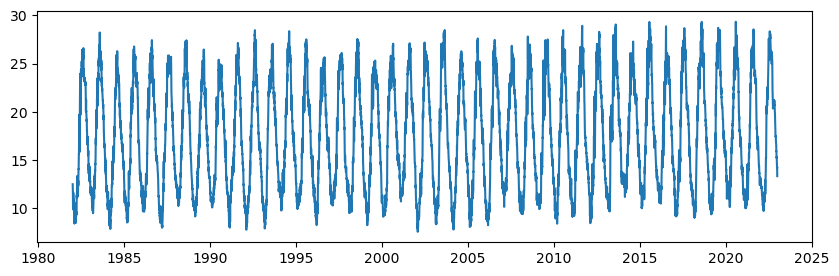

In [9]:
# For the marine heatwave toolbox, we'll need to use a specific format with numpy arrays
sst = data["Temp"].values
t = np.array([data.index[i].toordinal() for i in range(len(data.index)) ])  # final daily time vector we want the wind data on
t_datetime = data.index


plt.figure(figsize=(10,3))
plt.plot(t_datetime,sst)



In [10]:
# Run the marine heatwave algorithm with default settings

import marineHeatWaves_AS_v2 as mhw_v2

Time_Period = [1982, 2022]
mhws, clim = mhw_v2.detect(t, sst, climatologyPeriod = Time_Period, MHWPeriod = Time_Period, smoothPercentileWidth = 31, pctile = 90)




In [11]:
# Run the marine heatwave algorithm with our climatology (do you expect any differences?)

alternate_clim = [t, data_clim_thres_doy_ind["Temp"].values]

Time_Period = [1982, 2022]
mhws2, clim2 = mhw_v2.detect(t, sst, climatologyPeriod = Time_Period, MHWPeriod = Time_Period, smoothPercentileWidth = 31,
                             alternateClimatology = alternate_clim, windowHalfWidth=1, smoothPercentile=True, minDuration=5, joinAcrossGaps=True, maxGap=2, maxPadLength=False)


## A few examples of useful figures and commands

In [13]:
# What is in mhw??? Let's explore the variables and their size

def fun_explore_mhws(mhws):
# print(mhws.items()) # prints keys and values
    for x in mhws.keys():
        if type(mhws[x]) is list:
            print(x, ', ', len(mhws[x]))
        else:
            print(x, ' =  ', mhws[x])

print("Default mhw algorithm")
fun_explore_mhws(mhws)
print("Mhw algorithm with our climatology")
fun_explore_mhws(mhws2)


### Note: Why is the number of events different? We did not look at +/- 2 days to create the percentile!

Default mhw algorithm
time_start ,  89
time_end ,  89
time_peak ,  89
date_start ,  89
date_end ,  89
date_peak ,  89
index_start ,  89
index_end ,  89
index_peak ,  89
duration ,  89
duration_moderate ,  89
duration_strong ,  89
duration_severe ,  89
duration_extreme ,  89
intensity_max ,  89
intensity_mean ,  89
intensity_var ,  89
intensity_cumulative ,  89
intensity_max_relThresh ,  89
intensity_mean_relThresh ,  89
intensity_var_relThresh ,  89
intensity_cumulative_relThresh ,  89
intensity_max_abs ,  89
intensity_mean_abs ,  89
intensity_var_abs ,  89
intensity_cumulative_abs ,  89
intensity_max_norm ,  89
category ,  89
intensity_mean_norm ,  89
rate_onset ,  89
rate_decline ,  89
intensity_time_series ,  89
t_time_series ,  89
n_events  =   89
Mhw algorithm with our climatology
time_start ,  83
time_end ,  83
time_peak ,  83
date_start ,  83
date_end ,  83
date_peak ,  83
index_start ,  83
index_end ,  83
index_peak ,  83
duration ,  83
duration_moderate ,  83
duration_strong ,

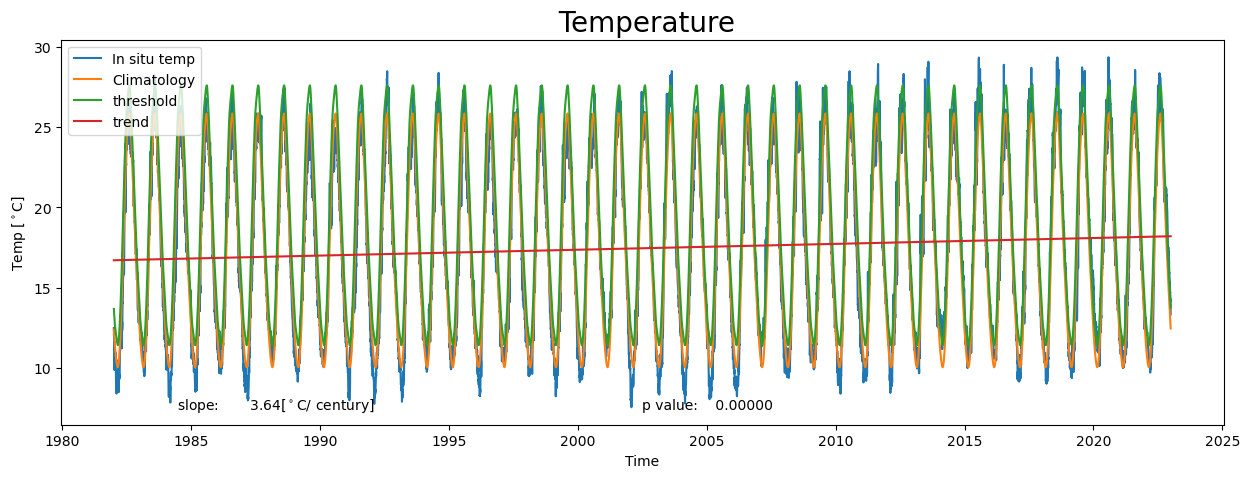

In [14]:
### Let's plot the time-series and explore
plt.figure(1,figsize=(15,5))
ax=plt.subplot(1,1,1)
plt.plot(t_datetime,sst)
plt.xlabel('Time')
plt.ylabel('Temp [$^\circ$C]')
plt.title(' Temperature', size=20)
plt.plot(t_datetime,clim['seas'])
plt.plot(t_datetime,clim['thresh'])
#plt.legend(['In situ temp','Climatology','threshold'])


from scipy import stats
# Trend: linear regression
nogaps = (~np.isnan(t) & ~np.isnan(sst))
slope, intercept, r_value, p_value, std_err = stats.linregress(t[nogaps],sst[nogaps])
yhat = intercept + slope*t

plt.plot(t_datetime,yhat)
plt.legend(['In situ temp','Climatology','threshold','trend'])
plt.text(0.1, 0.05,'slope: ' + "{:10.2f}".format(slope*365*100) + '[$^\circ$C/ century]', ha='left', va='center', transform=ax.transAxes)
plt.text(0.5, 0.05,'p value: ' + "{:10.5f}".format(p_value), ha='left', va='center', transform=ax.transAxes)

#plt.savefig('Plot_temp_clim.png')
plt.show()


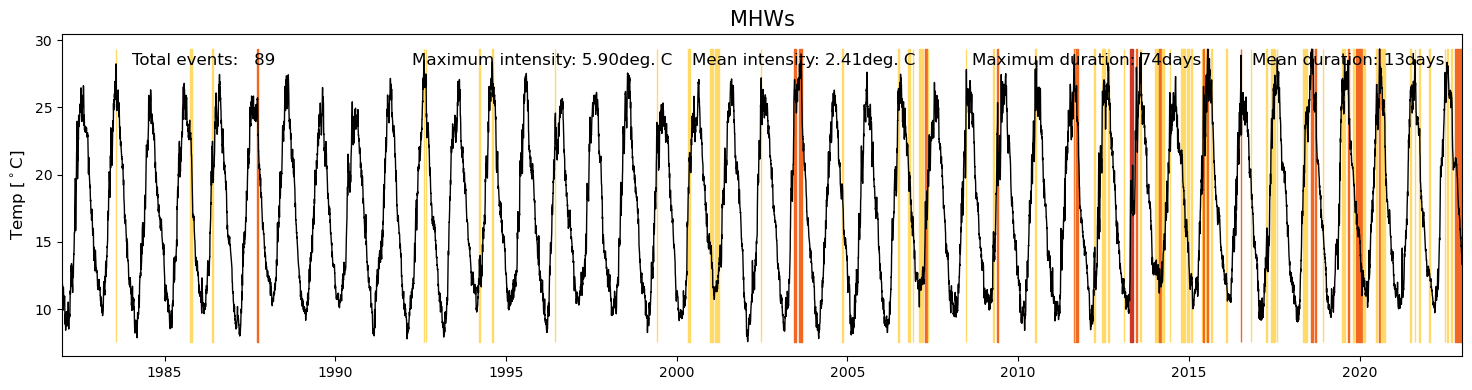

In [15]:
# Plot with categories and a few statistics of extreme events
import datetime

mhwname = 'MHW'
col_clim = '0.25'
col_thresh = 'k--'
col_evMax = 'r'
#From top to bottom: Blue, no marine heatwave, Moderate, Strong, Severe, Extreme
col_blue = (81/255, 99/255, 176/255) # blue
col_cat0 = (.5, .5, .50) # no
col_cat1 =  (255/255, 218/255, 103/255) # Moderate
col_cat2 =  (242/255, 103/255, 33/255) # Strong
col_cat3 =  (203/255, 56/255, 38/255) # Severe
col_cat4 =  (127/255, 20/255, 22/255)# Extreme

###
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(1,1,1)
plt.title('MHWs', size=15)
plt.plot(t_datetime, sst, 'k-', linewidth=1)

# Fill events
for i in range(mhws['n_events']):
    t1 = np.where(t==mhws['time_start'][i])[0][0]
    t2 = np.where(t==mhws['time_end'][i])[0][0]
    if mhws['category'][i] == 'Moderate':
        plt.fill_between(t_datetime[t1:t2+1], np.nanmin(sst), np.nanmax(sst), color=col_cat1)
    if mhws['category'][i] == 'Strong':
        plt.fill_between(t_datetime[t1:t2+1], np.nanmin(sst), np.nanmax(sst), color=col_cat2)
    if mhws['category'][i] == 'Severe':
        plt.fill_between(t_datetime[t1:t2+1], np.nanmin(sst), np.nanmax(sst), color=col_cat3)
    if mhws['category'][i] == 'Extreme':
        plt.fill_between(t_datetime[t1:t2+1], np.nanmin(sst), np.nanmax(sst), color=col_cat4)


# Stats
plt.text(0.05, 0.92,'Total events:' + "{:5.0f}".format(mhws['n_events']), ha='left', va='center', transform=ax.transAxes,size=12)
plt.text(0.25, 0.92,'Maximum intensity:' + "{:5.2f}".format(np.max(mhws['intensity_max'])) + 'deg. C', ha='left', va='center', transform=ax.transAxes,size=12)
plt.text(0.45, 0.92,'Mean intensity:' + "{:5.2f}".format(np.mean(mhws['intensity_mean'])) + 'deg. C', ha='left', va='center', transform=ax.transAxes,size=12)
plt.text(0.65, 0.92,'Maximum duration:' + "{:3.0f}".format(np.max(mhws['duration'])) + 'days', ha='left', va='center', transform=ax.transAxes,size=12)
plt.text(0.85, 0.92,'Mean duration:' + "{:3.0f}".format(np.mean(mhws['duration'])) + 'days', ha='left', va='center', transform=ax.transAxes,size=12)


plt.ylabel(r'Temp [$^\circ$C]',size=12)
plt.xlim(datetime.datetime(1982,1,1), datetime.datetime(2023,1,1))
plt.tight_layout()

plt.show()


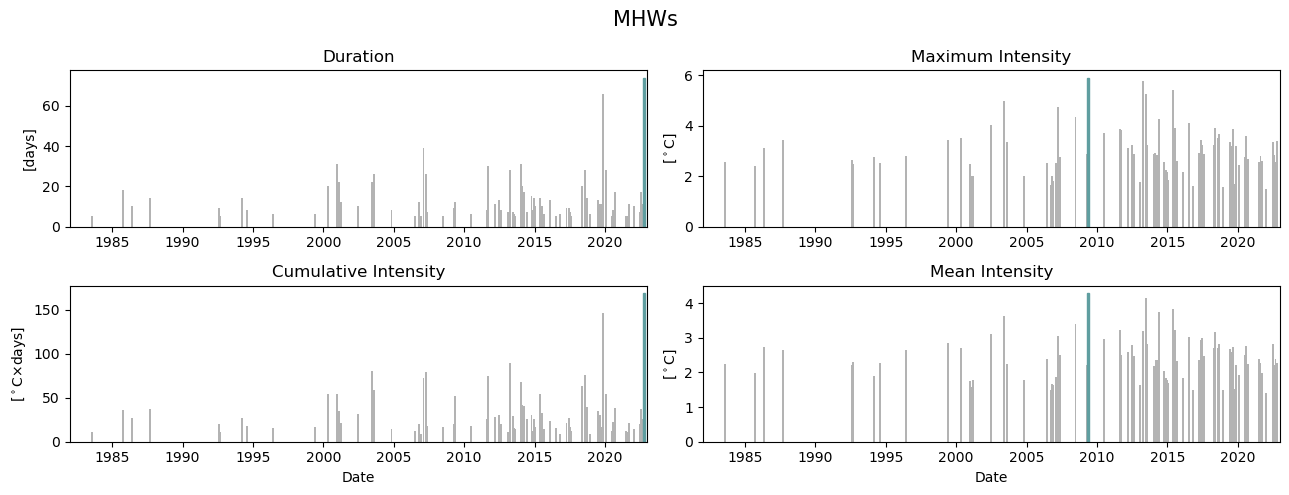

In [18]:
# More statistics to compare the characteristics of events over time

col_evdur = 'cadetblue'

### Plot per date
plt.figure(figsize=(13,5))
plt.suptitle('MHWs', size=15)

# Duration
plt.subplot(2,2,1)
ev = np.argmax(mhws['intensity_max']) # Find most intense event
evMax = np.argmax(mhws['duration']) # Find longest event
plt.bar(mhws['date_start'], mhws['duration'], width=50, color=(0.7,0.7,0.7))
plt.bar(mhws['date_start'][evMax], mhws['duration'][evMax], width=50, color=col_evdur, edgecolor=col_evdur)
plt.xlim(datetime.datetime(Time_Period[0],1,1), datetime.datetime(Time_Period[1]+1,1,1))
plt.ylabel('[days]')
plt.title('Duration')

# Maximum intensity
plt.subplot(2,2,2)
evMax = np.argmax(mhws['intensity_max'])
plt.bar(mhws['date_start'], mhws['intensity_max'], width=50, color=(0.7,0.7,0.7))
plt.bar(mhws['date_start'][evMax], mhws['intensity_max'][evMax], width=50, color=col_evdur, edgecolor=col_evdur)
plt.xlim(datetime.datetime(Time_Period[0],1,1), datetime.datetime(Time_Period[1]+1,1,1))
plt.ylabel(r'[$^\circ$C]')
plt.title('Maximum Intensity')

# Mean intensity
plt.subplot(2,2,4)
evMax = np.argmax(mhws['intensity_mean'])
plt.bar(mhws['date_start'], mhws['intensity_mean'], width=50, color=(0.7,0.7,0.7))
plt.bar(mhws['date_start'][evMax], mhws['intensity_mean'][evMax], width=50, color=col_evdur, edgecolor=col_evdur)
plt.xlim(datetime.datetime(Time_Period[0],1,1), datetime.datetime(Time_Period[1]+1,1,1))
plt.title('Mean Intensity')
plt.ylabel(r'[$^\circ$C]')
plt.xlabel('Date')

# Cumulative intensity
plt.subplot(2,2,3)
evMax = np.argmax(mhws['intensity_cumulative'])
plt.bar(mhws['date_start'], mhws['intensity_cumulative'], width=50, color=(0.7,0.7,0.7))
plt.bar(mhws['date_start'][evMax], mhws['intensity_cumulative'][evMax], width=50, color=col_evdur, edgecolor=col_evdur)
plt.xlim(datetime.datetime(Time_Period[0],1,1), datetime.datetime(Time_Period[1]+1,1,1))
plt.title(r'Cumulative Intensity')
plt.ylabel(r'[$^\circ$C$\times$days]')
plt.xlabel('Date')

plt.tight_layout()
plt.show()


# Now explore MHW detection yourself!

- Follow the instructions for your lab and answer the questions, starting with the above code or otherwise.
- Below are a few lines to format a time-series dowloaded from
https://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst21Agg.html
where you can pick you own location!

-----------------

,time,zlev,latitude,longitude,sst
0,UTC,m,degrees_north,degrees_east,degree_C
1,1981-09-01T12:00:00Z,0.0,-39.875,160.125,13.33
2,1981-09-02T12:00:00Z,0.0,-39.875,160.125,13.35
3,1981-09-03T12:00:00Z,0.0,-39.875,160.125,13.34
4,1981-09-04T12:00:00Z,0.0,-39.875,160.125,13.33


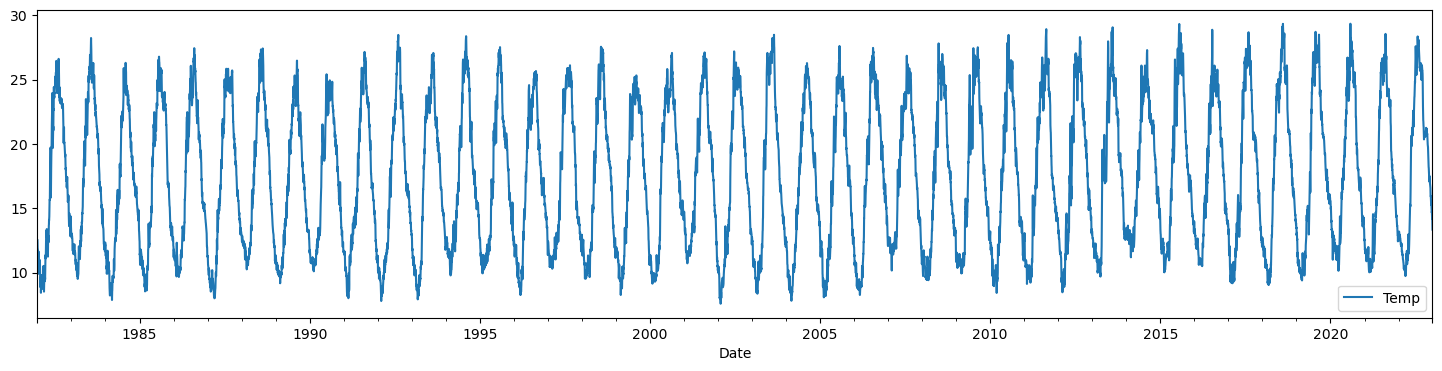

In [19]:
## Read the file and plot quickly
data2 = pd.read_csv('ncdcOisst21Agg_picklocation.csv')

data.plot(figsize=(18, 4));
data2.head()


,Temp
Date,
1981-09-01 12:00:00+00:00,13.33
1981-09-02 12:00:00+00:00,13.35
1981-09-03 12:00:00+00:00,13.34
1981-09-04 12:00:00+00:00,13.33
1981-09-05 12:00:00+00:00,13.06


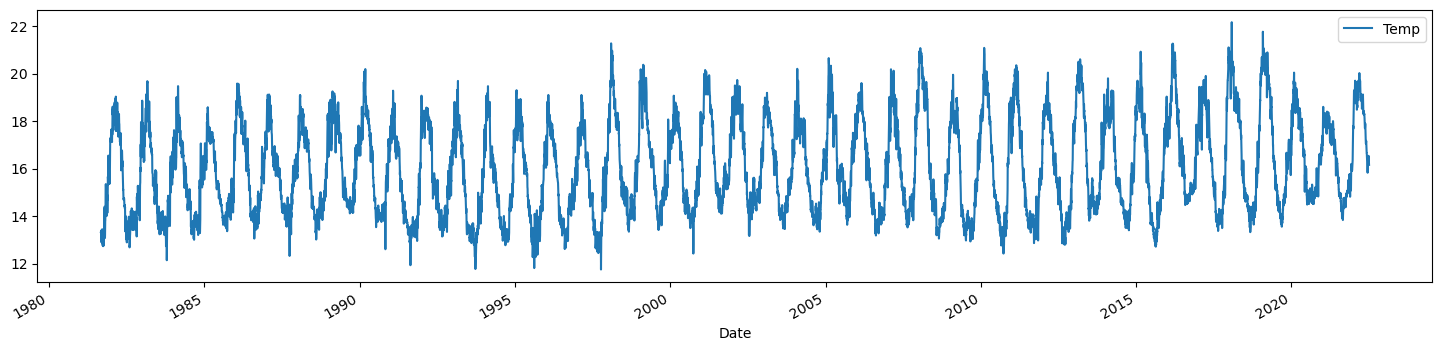

In [20]:
# Reformat the dataframe
data2 = data2.iloc[1:]
data2["Date"] = pd.to_datetime(data2['time'])
data2.set_index("Date", inplace=True)
data2.drop(['time','longitude','latitude','zlev'], axis=1, inplace=True)
data2.rename(columns={'sst': 'Temp'}, inplace=True)
data2['Temp']=data2['Temp'].astype(float)

data2.plot(figsize=(18, 4));
data2.head()

## Now write your own code:)